# 1. 포켓몬 분류

* Train: https://www.kaggle.com/datasets/thedagger/pokemon-generation-one
* Validation: https://www.kaggle.com/hlrhegemony/pokemon-image-dataset

In [ ]:
import os

In [ ]:
os.environ['KAGGLE_USERNAME'] = ''
os.environ['KAGGLE_KEY'] = ''

In [ ]:
!kaggle datasets download -d thedagger/pokemon-generation-one # 캐글 api다운로드

pokemon-generation-one.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip -q pokemon-generation-one.zip # 압축풀기

In [ ]:
!kaggle datasets download -d hlrhegemony/pokemon-image-dataset

pokemon-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip -q pokemon-image-dataset.zip

In [ ]:
!mv dataset train # 데이터셋 폴더를 train으로

In [ ]:
!rm -rf train/dataset # 데이터셋 폴더삭제

In [ ]:
!mv images validation # 이미지 폴더를 validation폴더로

In [ ]:
train_labels = os.listdir('train')
print(train_labels)
print(len(train_labels))

['Kangaskhan', 'Zapdos', 'Aerodactyl', 'Alakazam', 'Wigglytuff', 'Charmander', 'Tangela', 'Seel', 'Sandshrew', 'Nidoqueen', 'Seaking', 'Raticate', 'Exeggcute', 'Fearow', 'Magmar', 'Kabutops', 'Tentacool', 'Growlithe', 'Gyarados', 'Oddish', 'Kadabra', 'Rapidash', 'Venonat', 'Electabuzz', 'Primeape', 'Cloyster', 'Jynx', 'Machamp', 'Gengar', 'Seadra', 'Dragonair', 'Rhyhorn', 'Pinsir', 'Flareon', 'Graveler', 'Geodude', 'Krabby', 'Chansey', 'Machoke', 'Zubat', 'Snorlax', 'Venusaur', 'Clefairy', 'Vaporeon', 'Weezing', 'Raichu', 'Pikachu', 'Parasect', 'Porygon', 'Hitmonchan', 'Drowzee', 'Psyduck', 'Golduck', 'Nidorina', 'Arcanine', 'Diglett', 'Omanyte', 'Paras', 'Staryu', 'Hitmonlee', 'Kabuto', 'Golem', 'Ponyta', 'Arbok', 'Slowbro', 'Magneton', 'Sandslash', 'Scyther', 'Doduo', 'Machop', 'Farfetchd', 'Butterfree', 'Poliwhirl', 'Mewtwo', 'Gastly', 'Vileplume', 'Metapod', 'Tauros', 'Lickitung', 'Poliwrath', 'Slowpoke', 'Nidorino', 'Abra', 'Victreebel', 'Voltorb', 'Ninetales', 'Exeggutor', 'Bulba

In [ ]:
val_labels = os.listdir('validation')
print(val_labels)
print(len(val_labels))

['Kangaskhan', 'Zapdos', 'Aerodactyl', 'Alakazam', 'Wigglytuff', 'Charmander', 'Tangela', 'Seel', 'Sandshrew', 'Nidoqueen', 'Seaking', 'Raticate', 'Exeggcute', 'Fearow', 'Magmar', 'Kabutops', 'Tentacool', 'Growlithe', 'Gyarados', 'Oddish', 'Kadabra', 'Rapidash', 'Venonat', 'Electabuzz', 'Primeape', 'Cloyster', 'Jynx', 'Machamp', 'Gengar', 'Seadra', 'Dragonair', 'Rhyhorn', 'Pinsir', 'Flareon', 'Graveler', 'Geodude', 'Krabby', 'Chansey', 'Machoke', 'Zubat', 'Snorlax', 'Venusaur', 'Clefairy', 'Vaporeon', 'Weezing', 'Raichu', 'Pikachu', 'Parasect', 'Porygon', 'Hitmonchan', 'Drowzee', 'Psyduck', 'Golduck', 'Nidorina', 'Arcanine', 'Diglett', 'Omanyte', 'Paras', 'Staryu', 'Hitmonlee', 'Kabuto', 'Golem', 'Ponyta', 'Arbok', 'Slowbro', 'Magneton', 'Sandslash', 'Scyther', 'Doduo', 'Machop', 'Farfetchd', 'Butterfree', 'Poliwhirl', 'Mewtwo', 'Gastly', 'Vileplume', 'Metapod', 'Tauros', 'Lickitung', 'Poliwrath', 'Slowpoke', 'Nidorino', 'Abra', 'Victreebel', 'Voltorb', 'Ninetales', 'Exeggutor', 'Bulba

In [ ]:
import shutil

In [ ]:
for val_label in val_labels:
    if val_label not in train_labels:
        shutil.rmtree(os.path.join('validation', val_label))

In [ ]:
val_labels = os.listdir('validation')
len(val_labels)

149

In [ ]:
for train_label in train_labels:
    if train_label not in val_labels:
        print(train_label)

In [ ]:
# 빈 폴더 만들어주기
for train_label in train_labels:
    if train_label not in val_labels:
        print(train_label)
        os.makedirs(os.path.join('validation', train_label), exist_ok=True)

In [ ]:
val_labels = os.listdir('validation')
len(val_labels)

149

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        # 각도, 찌그러뜨림, 크기
        transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),
        # 수평으로 뒤집기
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ]),
    'validation': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])
}

In [ ]:
image_datasets = {
    'train': datasets.ImageFolder('train', data_transforms['train']),
    'validation': datasets.ImageFolder('validation', data_transforms['validation'])
}

In [ ]:
dataloaders = {
    'train': DataLoader(
        image_datasets['train'],
        batch_size=32,
        shuffle=True
    ),
    'validation': DataLoader(
        image_datasets['validation'],
        batch_size=32,
        shuffle=False
    )
}

In [ ]:
print(len(image_datasets['train']), len(image_datasets['validation']))

10657 661


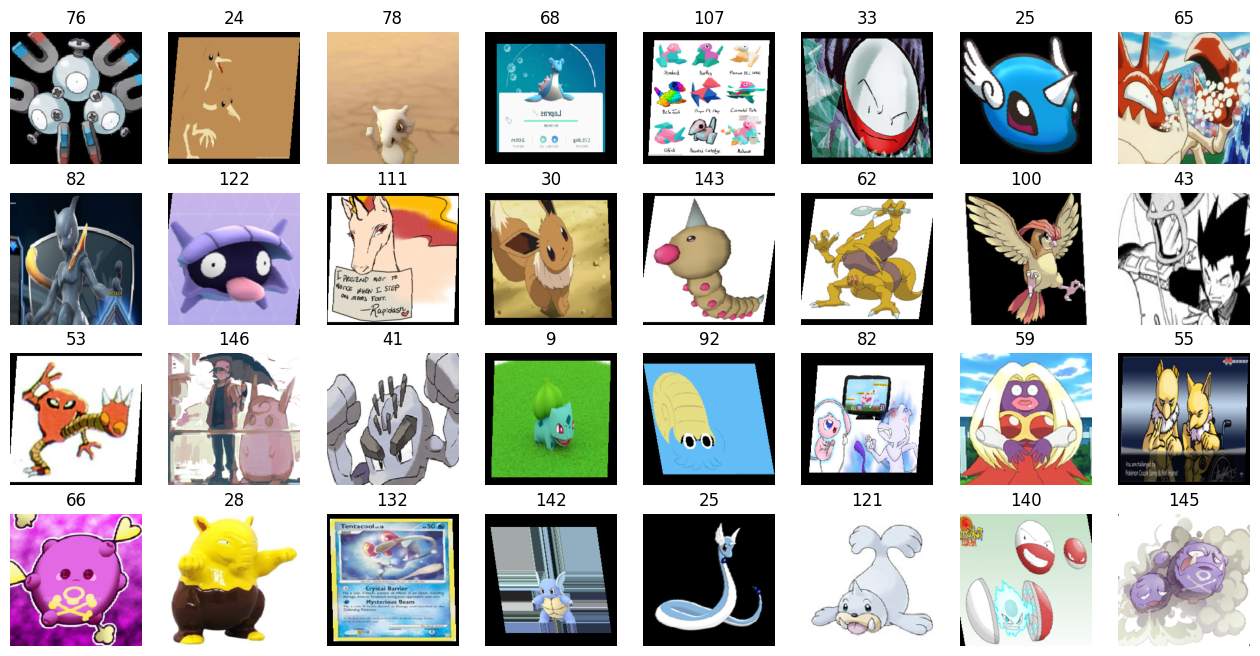

In [ ]:
# 이미지 시각화
imgs, labels = next(iter(dataloaders['train']))

fig, axes = plt.subplots(4, 8, figsize=(16, 8))

for ax, img, label in zip(axes.flatten(), imgs, labels):
    ax.imshow(img.permute(1, 2, 0)) # (3, 224, 224) -> (224, 224, 3)
    ax.set_title(label.item())
    ax.axis('off')

In [ ]:
# 이름알아내기
image_datasets['train'].classes[101]

'Pikachu'

In [ ]:
from torchvision.models import efficientnet_b4, EfficientNet_B4_Weights
from torchvision.models._api import WeightsEnum
from torch.hub import load_state_dict_from_url

In [ ]:
def get_state_dict(self, *args, **kwargs):
    kwargs.pop("check_hash")
    return load_state_dict_from_url(self.url, *args, **kwargs)

WeightsEnum.get_state_dict = get_state_dict

In [ ]:
# 사전 학습된 EfficientNetB4 모델
model = efficientnet_b4(weights=EfficientNet_B4_Weights.IMAGENET1K_V1)
model = efficientnet_b4(weights='DEFAULT').to(device)

Downloading: "https://download.pytorch.org/models/efficientnet_b4_rwightman-7eb33cd5.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b4_rwightman-7eb33cd5.pth
100%|██████████| 74.5M/74.5M [00:00<00:00, 89.3MB/s]


In [ ]:
model

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
            (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(48, 12, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(12, 48, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActiv

In [ ]:
for param in model.parameters():
    param.requires_grad = False

model.classifier = nn.Sequential(
    nn.Linear(1792, 512),
    nn.ReLU(),
    nn.Linear(512, 149)
).to(device)
print(model)

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
            (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(48, 12, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(12, 48, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActiv

In [ ]:
optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)

epochs = 10

for epoch in range(epochs):
    for phase in ['train', 'validation']:
        if phase == 'train':
            model.train()
        else:
            model.eval()

        sum_losses = 0
        sum_accs = 0

        for x_batch, y_batch in dataloaders[phase]:
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)

            y_pred = model(x_batch)
            loss = nn.CrossEntropyLoss()(y_pred, y_batch)

            if phase == 'train':
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            sum_losses = sum_losses + loss

            y_prob = nn.Softmax(1)(y_pred)
            y_pred_index = torch.argmax(y_prob, axis=1)
            acc = (y_batch == y_pred_index).float().sum() / len(y_batch) * 100
            sum_accs = sum_accs + acc

        avg_loss = sum_losses / len(dataloaders[phase])
        avg_acc = sum_accs / len(dataloaders[phase])
        print(f'{phase:10s}: Epoch {epoch+1:4d}/{epochs} Loss: {avg_loss:.4f} Accuracy: {avg_acc:.2f}%')

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


train     : Epoch    1/10 Loss: 3.3538 Accuracy: 29.51%
validation: Epoch    1/10 Loss: 1.5595 Accuracy: 66.87%
train     : Epoch    2/10 Loss: 1.8441 Accuracy: 56.13%
validation: Epoch    2/10 Loss: 0.8931 Accuracy: 78.11%
train     : Epoch    3/10 Loss: 1.5109 Accuracy: 63.25%
validation: Epoch    3/10 Loss: 0.7300 Accuracy: 82.36%
train     : Epoch    4/10 Loss: 1.3100 Accuracy: 67.95%
validation: Epoch    4/10 Loss: 0.7680 Accuracy: 79.83%
train     : Epoch    5/10 Loss: 1.1842 Accuracy: 70.10%
validation: Epoch    5/10 Loss: 0.6533 Accuracy: 83.47%
train     : Epoch    6/10 Loss: 1.0621 Accuracy: 72.59%
validation: Epoch    6/10 Loss: 0.5857 Accuracy: 85.03%
train     : Epoch    7/10 Loss: 0.9947 Accuracy: 74.06%
validation: Epoch    7/10 Loss: 0.5744 Accuracy: 86.52%
train     : Epoch    8/10 Loss: 1.0276 Accuracy: 74.14%
validation: Epoch    8/10 Loss: 0.5419 Accuracy: 87.71%
train     : Epoch    9/10 Loss: 0.9053 Accuracy: 76.38%
validation: Epoch    9/10 Loss: 0.5781 Accuracy:

In [ ]:
# 학습된 모델 파일 저장
torch.save(model.state_dict(), 'model.pth') # model.h5 / 텐서플로우

In [ ]:
# 원하는 모델 불러오기
model = models.efficientnet_b4().to(device)
# 끝부분(fc) 수정
model.classifier = nn.Sequential(
    nn.Linear(1792, 512),
    nn.ReLU(),
    nn.Linear(512,149)
).to(device)

print(model)

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
            (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(48, 12, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(12, 48, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActiv

In [ ]:
# 모델에 학습된 내용 불러오기 가능
model.load_state_dict(torch.load('model.pth'))

<All keys matched successfully>

In [ ]:
model.eval() # 테스트모드로 작동

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
            (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(48, 12, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(12, 48, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActiv

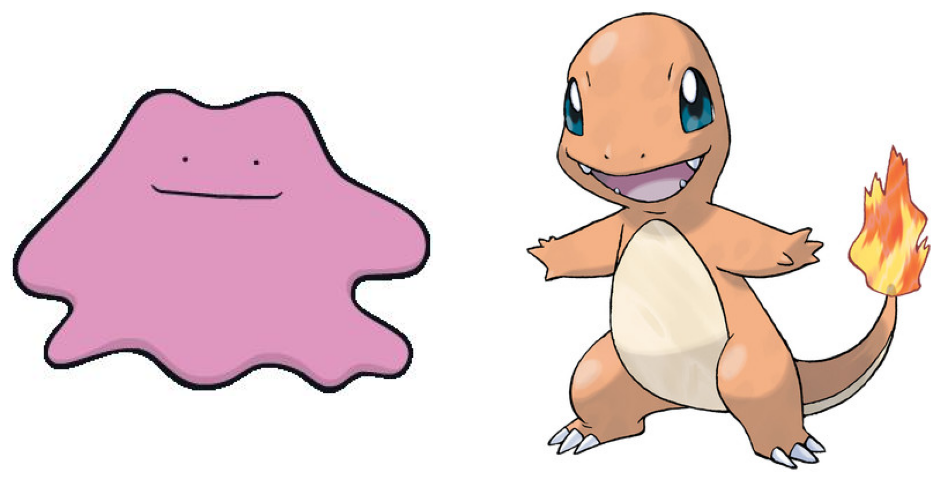

In [ ]:
# 테스트할 이미지 불러오기
from PIL import Image

img1 = Image.open('./validation/Ditto/3.jpg')
img2 = Image.open('./validation/Charmander/0.jpg')

fig, axes = plt.subplots(1,2,figsize=(12,6))
axes[0].imshow(img1)
axes[0].axis('off')
axes[1].imshow(img2)
axes[1].axis('off')
plt.show()

In [ ]:
# 이미지 변환 및 텐서형태 변환
img1_input = data_transforms['validation'](img1)
img2_input = data_transforms['validation'](img2)
print(img1_input.shape)
print(img2_input.shape) # 크기 : [3, 224, 224]

torch.Size([3, 224, 224])
torch.Size([3, 224, 224])


In [ ]:
# 2차원 텐서 생성
test_batch = torch.stack([img1_input, img2_input])
test_batch = test_batch.to(device)
test_batch.shape # 크기 : [2, 3, 224, 224]

torch.Size([2, 3, 224, 224])

In [ ]:
# 예측해보기
y_pred = model(test_batch)
y_pred

tensor([[-7.4805e+00, -9.9806e+00, -9.4255e+00, -1.4488e+01, -1.4604e+01,
         -1.7318e+01, -1.4827e+01, -1.0453e+01, -1.1339e+01, -7.4101e+00,
         -1.5733e+01, -1.1689e+01, -5.6109e+00, -1.2653e+01, -8.9593e+00,
         -7.6397e+00, -6.8310e+00, -4.8675e+00, -8.2212e+00, -7.9528e+00,
         -6.6106e+00, -1.0847e+01, -1.9016e-02, -1.5285e+01, -1.2308e+01,
         -1.3745e+01, -1.0697e+01, -1.0783e+01, -4.4890e+00, -1.1523e+01,
         -1.5836e+01, -9.8013e+00, -1.4935e+01, -1.1651e+01, -1.2666e+01,
         -1.5348e+01, -1.0310e+01, -1.4118e+01, -1.0860e+01, -4.8376e+00,
         -6.4661e+00, -8.8200e+00, -1.0121e+01, -9.1607e+00, -8.4853e+00,
         -8.5006e+00, -9.8187e+00, -9.4375e+00, -5.3431e+00, -1.0110e+01,
         -1.4498e+01, -6.4090e+00, -8.7773e+00, -9.2778e+00, -1.2680e+01,
         -9.8533e+00, -1.2235e+01, -8.5128e+00, -1.2900e+01, -1.2296e+01,
         -1.2013e+01, -9.5985e+00, -9.1123e+00, -1.2166e+01, -9.7882e+00,
         -9.6557e+00, -5.0918e+00, -8.

In [ ]:
# 확률구하기 - 149가지
y_prob = nn.Softmax(1)(y_pred)
y_prob

tensor([[5.3653e-04, 4.4037e-05, 7.6714e-05, 4.8569e-07, 4.3222e-07, 2.8662e-08,
         3.4613e-07, 2.7450e-05, 1.1316e-05, 5.7564e-04, 1.3979e-07, 7.9748e-06,
         3.4797e-03, 3.0435e-06, 1.2228e-04, 4.5754e-04, 1.0272e-03, 7.3178e-03,
         2.5581e-04, 3.3454e-04, 1.2805e-03, 1.8517e-05, 9.3339e-01, 2.1875e-07,
         4.2956e-06, 1.0209e-06, 2.1521e-05, 1.9731e-05, 1.0684e-02, 9.4160e-06,
         1.2614e-07, 5.2681e-05, 3.1050e-07, 8.2878e-06, 3.0032e-06, 2.0548e-07,
         3.1677e-05, 7.0294e-07, 1.8267e-05, 7.5403e-03, 1.4795e-03, 1.4056e-04,
         3.8285e-05, 9.9969e-05, 1.9643e-04, 1.9344e-04, 5.1776e-05, 7.5798e-05,
         4.5482e-03, 3.8702e-05, 4.8082e-07, 1.5664e-03, 1.4669e-04, 8.8924e-05,
         2.9613e-06, 5.0016e-05, 4.6204e-06, 1.9110e-04, 2.3765e-06, 4.3465e-06,
         5.7720e-06, 6.4529e-05, 1.0493e-04, 4.9490e-06, 5.3380e-05, 6.0941e-05,
         5.8476e-03, 1.6164e-04, 1.3011e-04, 2.6159e-04, 1.2931e-04, 1.2381e-05,
         1.5141e-04, 1.6221e

In [ ]:
# 가장 높은 n가지의 확률의 인덱스와 값을 가져오기
probs, idx = torch.topk(y_prob, k=3)
print(probs)
print(idx)

tensor([[9.3339e-01, 1.0684e-02, 7.5403e-03],
        [9.9238e-01, 6.1554e-03, 5.1040e-04]], device='cuda:0',
       grad_fn=<TopkBackward0>)
tensor([[ 22,  28,  39],
        [ 14, 127,  15]], device='cuda:0')


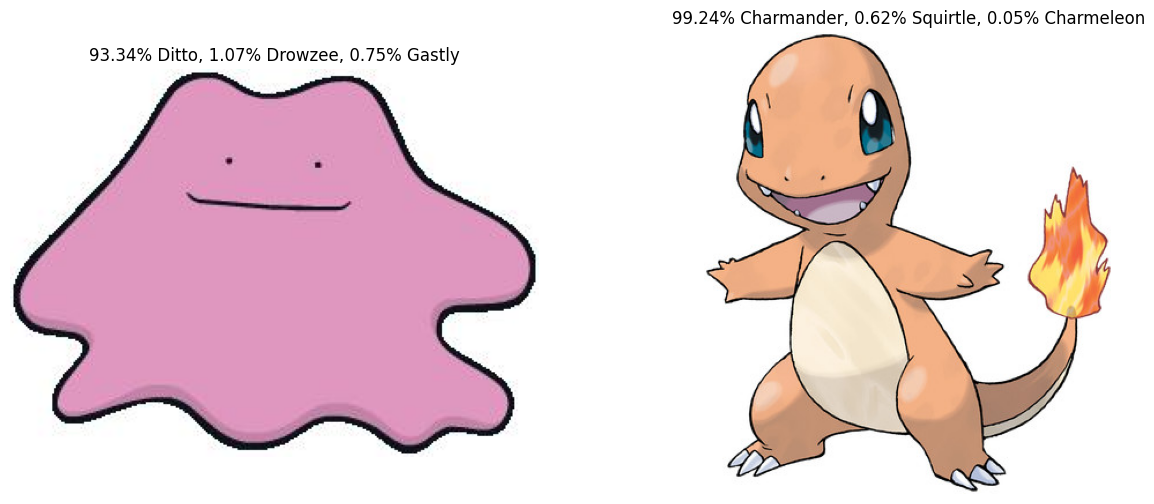

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].set_title('{:.2f}% {}, {:.2f}% {}, {:.2f}% {}'.format(
    probs[0, 0] * 100,
    image_datasets['validation'].classes[idx[0, 0]],
    probs[0, 1] * 100,
    image_datasets['validation'].classes[idx[0, 1]],
    probs[0, 2] * 100,
    image_datasets['validation'].classes[idx[0, 2]]
))
axes[0].imshow(img1)
axes[0].axis('off')

axes[1].set_title('{:.2f}% {}, {:.2f}% {}, {:.2f}% {}'.format(
    probs[1, 0] * 100,
    image_datasets['validation'].classes[idx[1, 0]],
    probs[1, 1] * 100,
    image_datasets['validation'].classes[idx[1, 1]],
    probs[1, 2] * 100,
    image_datasets['validation'].classes[idx[1, 2]]
))
axes[1].imshow(img2)
axes[1].axis('off')
plt.show()